# Machine Learning Implementation

<font size = 3>
We will be implementation two types forms of random forest, a regular random forest and a random forest that uses pipeline. The point of this step is to be able to create a model that can accurately predict a listing price based on the features the listing has. This will be where we can possibly generate a model that provides good business value for Airbnb.

In [1]:
#import libraries that will be used in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from math import sqrt
from matplotlib import rcParams

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Mean Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE))
    

In [2]:
#observe our data is read correctly, and processed correctly
airbnb_df = pd.read_csv(r"C:\Users\darre\OneDrive\Documents\Capstone One Clean\Airbnb_NYC_Original.csv")
airbnb_df.head(5)

,beds,city,market,bedrooms,bathrooms,minimum_nights,price,property_type,accommodates,room_type,neighbourhood_group_cleansed,availability_365,latitude_longitude_bin
0,1,188,11,0,2,7,225.0,1,1,0,2,365,13
1,17,48,11,1,2,1,89.0,19,3,0,1,137,9
2,1,188,11,1,2,3,200.0,1,2,0,2,0,13
3,1,188,11,1,2,2,79.0,1,2,2,2,216,13
4,1,188,11,1,2,2,79.0,1,1,2,2,0,16


In [3]:
#shuffle rows
airbnb_df = shuffle(airbnb_df)
airbnb_df.head(5)

,beds,city,market,bedrooms,bathrooms,minimum_nights,price,property_type,accommodates,room_type,neighbourhood_group_cleansed,availability_365,latitude_longitude_bin
10123,1,188,11,1,3,30,100.0,23,2,2,2,0,16
15862,11,48,11,6,5,7,150.0,13,4,0,1,0,9
37953,11,48,11,1,2,6,170.0,28,2,0,1,6,9
16285,1,48,11,1,2,2,85.0,1,1,2,1,0,13
16725,1,188,11,1,2,3,125.0,1,2,2,2,46,13


In [4]:
#Create our train test data
y = airbnb_df['price']
X = airbnb_df.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,random_state = 42)

In [5]:
#fit our model
model = RandomForestClassifier(n_estimators = 50, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [6]:
#predict on our test set
y_pred_class = model.predict(X_test)

In [7]:
model.score(X_test, y_test)

0.07129059519497767

In [8]:
#evaluate our model by observing the MAE, and RMSE
evaluate_model(model, X_test, y_test)

Mean Absolute Error: 29.0
RMSE: 108.55


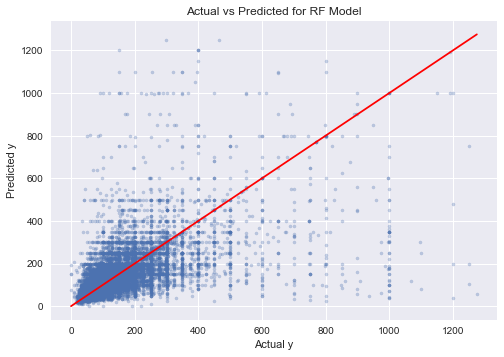

In [9]:
from matplotlib import rcParams
#plot our actual y vs u predicted
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_test, y_pred_class,alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Model')

#Prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')

In [10]:
#create the pipeline random forest and fit
my_pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(n_estimators = 50, random_state=42))

my_pipeline_RF.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [11]:
#predict on our test set
y_pred_pipe = my_pipeline_RF.predict(X_test)

In [12]:
#evaluate our model by observing the MAE and RMSE
evaluate_model(my_pipeline_RF, X_test, y_test)

Mean Absolute Error: 26.62
RMSE: 89.89


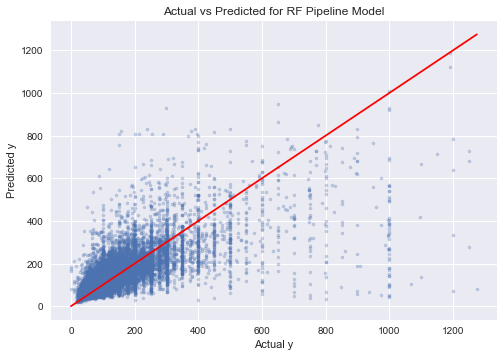

In [13]:
#plot our actual y vs u predicted
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_test, y_pred_pipe,alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Pipeline Model')

diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [14]:
#display important features
importances = my_pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False).head(22)

,feature,importance
8,room_type,0.234301
4,bathrooms,0.166724
10,availability_365,0.152857
5,minimum_nights,0.079343
7,accommodates,0.078949
11,latitude_longitude_bin,0.072888
6,property_type,0.054771
1,city,0.051912
0,beds,0.042969
3,bedrooms,0.042019


In [15]:
#Hyperparamter tuning
z = [('imputer', SimpleImputer())]
z = [('scaler', StandardScaler())]
z = [('rf', RandomForestRegressor(random_state = 42))]
param_grid = {    
             'rf__max_depth': np.arange(1, 25),
             'rf__n_estimators': [50,100]}

tuned_pipeline = Pipeline(z)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,random_state = 42)
X_train = preprocessing.scale(X_train) 
tuned_pipeline_cv = GridSearchCV(tuned_pipeline, param_grid, cv=3, n_jobs = -1, verbose = 2)
tuned_pipeline_cv.fit(X_train, y_train)
tuned_pipeline_cv.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   46.0s finished


{'rf__max_depth': 13, 'rf__n_estimators': 100}

In [16]:
tuned_pipeline_cv.best_score_

0.5454595740946168

In [17]:
#train teset split our data, create our model with recommended parameters, and fit our model
y = airbnb_df['price']
X = airbnb_df.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,random_state = 42)
model = RandomForestClassifier(max_depth = 13,n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, random_state=42)

In [18]:
#evaluate our model based on MAE and RMSE
evaluate_model(model, X_test, y_test)

Mean Absolute Error: 25.0
RMSE: 96.47


In [20]:
#predict on our test set
y_pred = model.predict(X_test)

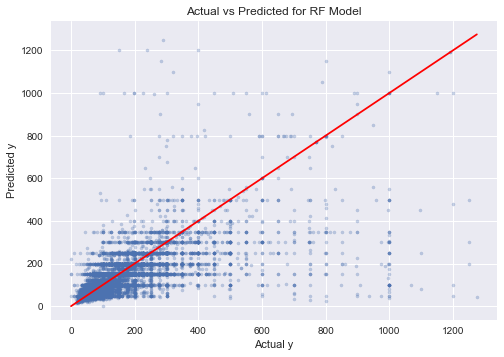

In [21]:
#plot our actual vs predicted
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_test, y_pred,alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Model')

diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')

In [22]:
#create our pipeline random forest with recommended parameters, and fit our model
my_pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(max_depth = 13, n_estimators = 100, random_state=42))

my_pipeline_RF.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=13, random_state=42))])

In [23]:
#evaluate our model based on MAE and RMSE
evaluate_model(my_pipeline_RF, X_test, y_test)

Mean Absolute Error: 25.52
RMSE: 86.19


In [24]:
#predict on our test set
y_pred_pipe2 = my_pipeline_RF.predict(X_test)

In [25]:
#ax = plt.figure(figsize = (12,8))
#ax = sns.regplot(y_test,y_pred_pipe2, marker ='o', scatter_kws = {'s':10, 'alpha':.3}, line_kws = {'color': 'red'})
#ax.set(xlabel = 'Actual y', ylabel ='Predicted y', title = 'Actual vs Predicted for RF Pipeline Model')

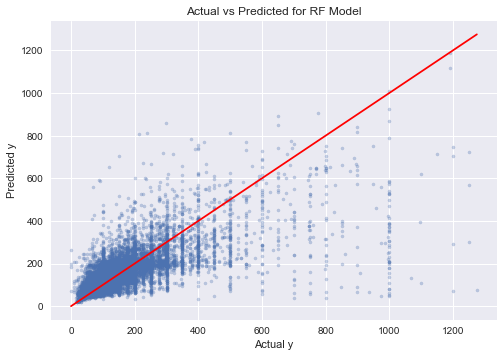

In [26]:
#plot our actual vs predicted
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_test, y_pred_pipe2, alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Model')

diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')

### Redoing our models now with 1000 estimators instead of 100

In [28]:
y = airbnb_df['price']
X = airbnb_df.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,random_state = 42)
model = RandomForestClassifier(max_depth = 13,n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=1000, random_state=42)

In [29]:
evaluate_model(model, X_test, y_test)
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

Mean Absolute Error: 25.0
RMSE: 95.65


0.4130547610350064

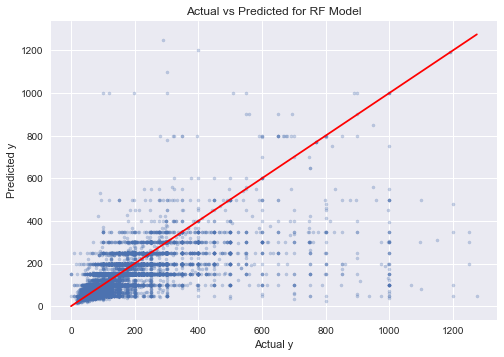

In [30]:
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_test, y_pred,alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Model')

diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')

In [31]:
my_pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(max_depth = 12, n_estimators = 1000, random_state=42))

my_pipeline_RF.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=12, n_estimators=1000,
                                       random_state=42))])

In [32]:
evaluate_model(my_pipeline_RF, X_test, y_test)
y_pred_pipe3 = my_pipeline_RF.predict(X_test)
r2_score(y_test,y_pred_pipe3)

Mean Absolute Error: 25.75
RMSE: 86.18


0.5235403188081351

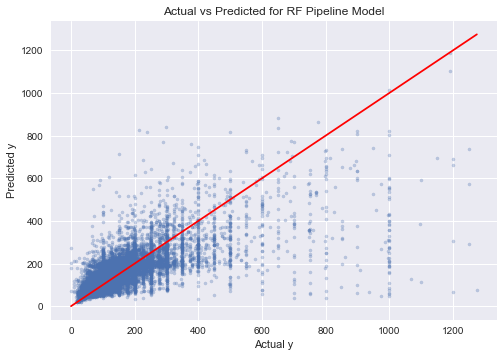

In [33]:
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_test, y_pred_pipe3,alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Pipeline Model')

diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')

### Summary

<font size = 3>
As we can see, the classifier does better in terms of MAE, predicting listing price with an error of just 25 dollars in comparison to the pipeline random forest MAE of 25.75 dollars. In terms of the fit of our data, the pipeline random forest does better with a RMSE of 86.1 in comparison to the random forest classifiers RMSE of 95.65. We recommend Airbnb to use the random forest classifier as it produces a better model in terms of error of how many dollars the model is off by.